In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
df=pd.read_csv("student_data.csv")

In [3]:
df.head()

,Marks 1,Marks 2,Admission
0,75,70,0
1,80,85,1
2,65,60,0
3,90,95,1
4,85,75,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Marks 1    100 non-null    int64
 1   Marks 2    100 non-null    int64
 2   Admission  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [5]:
feature_cols=['Marks 1','Marks 2']
x=df[feature_cols]
y=df.Admission

In [7]:
print(x.head())

   Marks 1  Marks 2
0       75       70
1       80       85
2       65       60
3       90       95
4       85       75


In [8]:
print(y.head())

0    0
1    1
2    0
3    1
4    1
Name: Admission, dtype: int64


In [9]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape

(75, 2)

In [10]:
x_test.shape

(25, 2)

In [11]:
m1=LogisticRegression()
m1.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_pred=m1.predict(x_test)
y_test

26    0
86    0
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    0
78    1
13    1
7     1
30    0
22    0
24    1
33    1
8     1
43    1
62    0
3     1
71    1
45    1
Name: Admission, dtype: int64

In [13]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [14]:
y_test

26    0
86    0
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    0
78    1
13    1
7     1
30    0
22    0
24    1
33    1
8     1
43    1
62    0
3     1
71    1
45    1
Name: Admission, dtype: int64

In [15]:
c1=metrics.confusion_matrix(y_test,y_pred)
print(c1)

[[ 8  0]
 [ 0 17]]


In [16]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


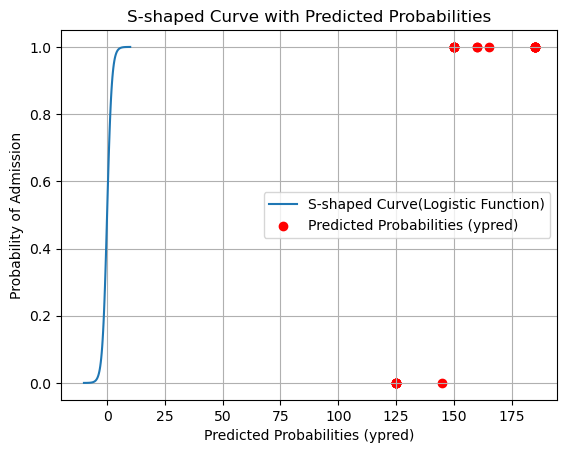

In [17]:
def logistic(x):
    return 1/(1+np.exp(-x))
x_values=np.linspace(-10,10,100)
y_values=logistic(x_values)
comb_marks=x_test['Marks 1']+x_test['Marks 2']
plt.plot(x_values,y_values,label='S-shaped Curve(Logistic Function)')
plt.scatter(comb_marks,y_pred,color='red',label='Predicted Probabilities (ypred)')
plt.title('S-shaped Curve with Predicted Probabilities')
plt.xlabel('Predicted Probabilities (ypred)')
plt.ylabel('Probability of Admission')
plt.legend()
plt.grid(True)
plt.show()